In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')


Import Liabraries

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#displaying null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
#check if any duplicated entries
data.duplicated().sum()

403

In [ ]:
# Remove duplicated entries
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

Preprocess Data

In [ ]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Rename columns
data.columns = ['label', 'text']

# Convert labels to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
print(data.isnull().sum())


label    0
text     0
dtype: int64


Feature engineering

In [ ]:
# Convert text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])

# Define target variable
y = data['label']


Split Data into Training and Testing Sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Machine Learning Model

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Make Predictions

In [ ]:
y_pred = model.predict(X_test)


Evaluate Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9825918762088974
Confusion Matrix:
[[880   9]
 [  9 136]]


Visualize the Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for visualization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score


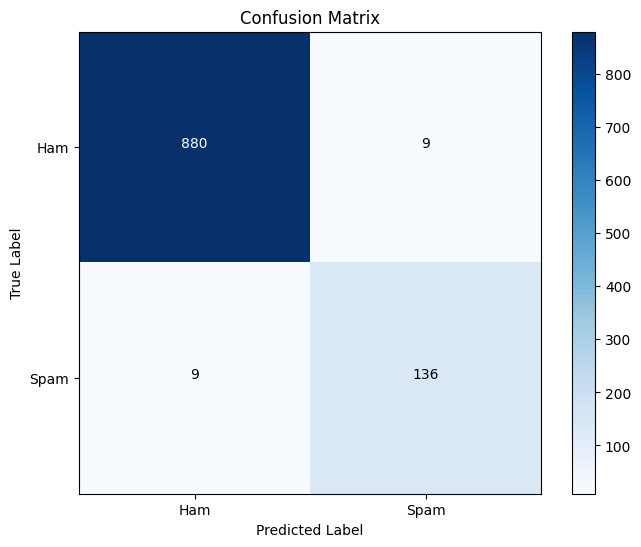

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.yticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()
